In [ ]:
"""""objective:
    pridict the probability of a word occouring in a negative review with respect to posititve review
    
   

In [2]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import string, re
from nltk.corpus import stopwords

In [3]:
import os
files_pos = os.listdir(r'C:/Users/dell/Desktop/train_pos')
files_neg = os.listdir(r'C:/Users/dell/Desktop/train_neg')
files_pos = [open(r'C:/Users/dell/Desktop/train_pos/'+f, 'r',encoding="utf8").read() for f in files_pos]

files_neg = [open(r'C:/Users/dell/Desktop/train_neg/'+f, 'r',encoding="utf8").read() for f in files_neg]

In [4]:
stop_words = list(set(stopwords.words('english')))
print(stop_words)

['ourselves', 'here', 'each', 'couldn', 're', 'me', 'll', "wasn't", 'doesn', 'do', 'that', 'themselves', 'because', 'don', 'our', "mustn't", 'my', 'about', 'haven', 'if', 'does', "wouldn't", 'd', "shan't", 'the', 'an', "you're", 'she', 'up', 'off', 'same', 'down', 'further', 'between', 'hers', 'it', 'to', "it's", 'below', 'by', 'just', "needn't", 've', 'yourselves', 'so', 'both', 'whom', 'any', "don't", 'where', 'shan', 'will', 'theirs', "mightn't", 'hasn', 'has', 'too', 'what', 'under', 'herself', 'aren', 'but', 's', 'were', 'did', "aren't", "that'll", 'few', 'from', "haven't", 'through', 'ours', 'while', 'him', "didn't", 'you', 'are', 'during', "weren't", 'y', 'at', 'having', 'he', 'o', 'when', 'after', 'on', 'there', 'her', 'for', 'i', 'those', 'a', 'weren', 'himself', "you'll", 'until', 'no', 'most', 'with', 'than', "won't", 'who', 'your', 'being', "shouldn't", 'its', 'once', 'such', 'again', 'be', 'before', 't', 'should', 'wasn', 'his', 'needn', 'shouldn', 'this', 'mustn', 'more',

In [17]:
#j is adjective, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]
all_words = []
documents = []

In [18]:
for p in files_pos:
    #creating tuple
    documents.append((p,"pos"))
    
    #remove puntuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    #tokenize
    tokenized = word_tokenize(cleaned)
    #"""Tokenize a string to split off punctuation other than periods"""
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    pos = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [ ]:
# tagger This package contains classes and interfaces for part-of-speech tagging, or simply “tagging”.

# tagger A “tag” is a case-sensitive string that specifies some property of a token, such as its part of speech. Tagged tokens are encoded as tuples (tag, token). For example, the following tagged token combines the word 'fly' with a noun part of speech tag ('NN'):

In [30]:
print(pos)

[('Workingclass', 'NNP'), ('romantic', 'JJ'), ('drama', 'NN'), ('director', 'NN'), ('Martin', 'NNP'), ('Ritt', 'NNP'), ('unbelievable', 'JJ'), ('come', 'NN'), ('yet', 'RB'), ('moments', 'VBZ'), ('pleasure', 'NN'), ('due', 'JJ'), ('mostly', 'RB'), ('charisma', 'JJ'), ('stars', 'NNS'), ('Jane', 'NNP'), ('Fonda', 'NNP'), ('Robert', 'NNP'), ('De', 'NNP'), ('Niro', 'NNP'), ('(', '('), ('terrific', 'NN'), (')', ')'), ('Shes', 'NNP'), ('widow', 'NN'), ('cant', 'NN'), ('move', 'NN'), ('hes', 'NNS'), ('illiterate', 'VBP'), ('closetinventoryou', 'NN'), ('probably', 'RB'), ('guess', 'JJ'), ('rest', 'NN'), ('Adaptation', 'NNP'), ('Pat', 'NNP'), ('Barkers', 'NNP'), ('novel', 'POS'), ('Union', 'NNP'), ('Street', 'NNP'), ('(', '('), ('better', 'RBR'), ('title', 'NN'), (')', ')'), ('laidback', 'NN'), ('verges', 'NNS'), ('bland', 'VBP'), ('films', 'NNS'), ('editing', 'VBG'), ('mess', 'NN'), ('still', 'RB'), ('pleasant', 'JJ'), ('rosyhued', 'VBN'), ('bluecollar', 'JJ'), ('fantasy', 'NN'), ('There', 'EX'

In [29]:
for w in pos:
    print(w)

('Workingclass', 'NNP')
('romantic', 'JJ')
('drama', 'NN')
('director', 'NN')
('Martin', 'NNP')
('Ritt', 'NNP')
('unbelievable', 'JJ')
('come', 'NN')
('yet', 'RB')
('moments', 'VBZ')
('pleasure', 'NN')
('due', 'JJ')
('mostly', 'RB')
('charisma', 'JJ')
('stars', 'NNS')
('Jane', 'NNP')
('Fonda', 'NNP')
('Robert', 'NNP')
('De', 'NNP')
('Niro', 'NNP')
('(', '(')
('terrific', 'NN')
(')', ')')
('Shes', 'NNP')
('widow', 'NN')
('cant', 'NN')
('move', 'NN')
('hes', 'NNS')
('illiterate', 'VBP')
('closetinventoryou', 'NN')
('probably', 'RB')
('guess', 'JJ')
('rest', 'NN')
('Adaptation', 'NNP')
('Pat', 'NNP')
('Barkers', 'NNP')
('novel', 'POS')
('Union', 'NNP')
('Street', 'NNP')
('(', '(')
('better', 'RBR')
('title', 'NN')
(')', ')')
('laidback', 'NN')
('verges', 'NNS')
('bland', 'VBP')
('films', 'NNS')
('editing', 'VBG')
('mess', 'NN')
('still', 'RB')
('pleasant', 'JJ')
('rosyhued', 'VBN')
('bluecollar', 'JJ')
('fantasy', 'NN')
('There', 'EX')
('overtures', 'VBZ')
('serious', 'JJ')
('issues', 'NN

In [28]:
#last element saved in iteration
for w in pos:
    print(w)
    print(w[0][0])
    print(w[1][0])

('Workingclass', 'NNP')
W
N
('romantic', 'JJ')
r
J
('drama', 'NN')
d
N
('director', 'NN')
d
N
('Martin', 'NNP')
M
N
('Ritt', 'NNP')
R
N
('unbelievable', 'JJ')
u
J
('come', 'NN')
c
N
('yet', 'RB')
y
R
('moments', 'VBZ')
m
V
('pleasure', 'NN')
p
N
('due', 'JJ')
d
J
('mostly', 'RB')
m
R
('charisma', 'JJ')
c
J
('stars', 'NNS')
s
N
('Jane', 'NNP')
J
N
('Fonda', 'NNP')
F
N
('Robert', 'NNP')
R
N
('De', 'NNP')
D
N
('Niro', 'NNP')
N
N
('(', '(')
(
(
('terrific', 'NN')
t
N
(')', ')')
)
)
('Shes', 'NNP')
S
N
('widow', 'NN')
w
N
('cant', 'NN')
c
N
('move', 'NN')
m
N
('hes', 'NNS')
h
N
('illiterate', 'VBP')
i
V
('closetinventoryou', 'NN')
c
N
('probably', 'RB')
p
R
('guess', 'JJ')
g
J
('rest', 'NN')
r
N
('Adaptation', 'NNP')
A
N
('Pat', 'NNP')
P
N
('Barkers', 'NNP')
B
N
('novel', 'POS')
n
P
('Union', 'NNP')
U
N
('Street', 'NNP')
S
N
('(', '(')
(
(
('better', 'RBR')
b
R
('title', 'NN')
t
N
(')', ')')
)
)
('laidback', 'NN')
l
N
('verges', 'NNS')
v
N
('bland', 'VBP')
b
V
('films', 'NNS')
f
N
('editing

In [19]:
for p in files_neg:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append((p, "neg"))
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    neg = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [26]:
for i in tokenized:
    print(i)

ViewState
Mode
Vid
FolderTypeGeneric


<FreqDist with 29739 samples and 504087 outcomes>


In [21]:
# creating a frequency distribution of each adjectives.
all_words = nltk.FreqDist(all_words)

In [22]:
# listing the 5000 most frequent words
word_features = list(all_words.keys())[:5000]
print(word_features)

['scramble', 'insightful', 'right', 'pathetic', 'pettiness', 'whole', 'episode', 'burn', 'classic', 'many', 'human', 'most', 'next', 'live', 'wall', 'br', 'rich', 'bet', 'future', 'thrown', 'cant', 'nickname', 'forehead', 'mutual', 'love', 'necessary', 'observant', 'slapstick', 'valuable', 'stupid', 'brilliant', 'dramatic', 'second', 'good', 'dishonest', 'funny', 'fantastic', 'crush', 'usual', 'hospital', 'invade', 'alltime', 'legs', 'big', 'better', 'underrated', 'realistic', 'flat', 'lovable', 'impressive', 'much', 'typical', 'followable', 'worth', 'overall', 'characteristic', 'best', 'comedic', 'recent', 'hybrid', 'mixed', 'new', 'isnt', 'sick', 'achieving', 'guide', 'third', 'real', 'able', 'subscribe', 'slow', 'unfolds', 'nice', 'notice', 'unnecessary', 'suspense', 'unexpectedness', 'hear', 'short', 'acclaimed', 'psychological', 'true', 'young', 'adoptive', 'secret', 'official', 'synopsisbr', 'lose', 'physical', 'obvious', 'certain', 'believable', 'exemplary', 'strong', 'several',

In [23]:
# function to create a dictionary of features for each review in the list document.
# The keys are the words in word_features 
# The values of each key are either true or false for wether that feature appears in the review or not

def find_features(document):
    words = word_tokenize(document)  #tokenized.
    for w in all_words:
        features[w] = (w in words)
    return features

# Creating features for each review
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [47]:
count=0
for i in featuresets:
    if count<1:
        print(i)
        print("***********")
        count=count+1

({'scramble': False, 'insightful': False, 'right': False, 'pathetic': False, 'pettiness': False, 'whole': False, 'episode': False, 'burn': False, 'classic': False, 'many': False, 'human': False, 'most': True, 'next': False, 'live': False, 'wall': False, 'br': False, 'rich': False, 'bet': False, 'future': False, 'thrown': False, 'cant': False, 'nickname': False, 'forehead': False, 'mutual': False, 'love': False, 'necessary': False, 'observant': False, 'slapstick': False, 'valuable': False, 'stupid': True, 'brilliant': False, 'dramatic': False, 'second': True, 'good': True, 'dishonest': False, 'funny': True, 'fantastic': False, 'crush': False, 'usual': False, 'hospital': False, 'invade': False, 'alltime': False, 'legs': False, 'big': False, 'better': False, 'underrated': False, 'realistic': False, 'flat': False, 'lovable': False, 'impressive': False, 'much': False, 'typical': False, 'followable': False, 'worth': False, 'overall': False, 'characteristic': False, 'best': True, 'comedic': F

In [50]:
z=[]
x=[]
#Shuffling the dictionary 
random.shuffle(featuresets)
train = 25000
test = 20000
training_set = featuresets[:25000]
testing_set = featuresets[20000:]

z.append(train/test)
x.append(test/train)

In [25]:

y=[]
classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 85.18296340731854
Most Informative Features
             unwatchable = True              neg : pos    =     26.7 : 1.0
                 lighten = True              pos : neg    =     15.7 : 1.0
           unpretentious = True              pos : neg    =     15.7 : 1.0
                flawless = True              pos : neg    =     13.2 : 1.0
                  turgid = True              neg : pos    =     11.4 : 1.0
                 droning = True              neg : pos    =     11.0 : 1.0
               pointless = True              neg : pos    =     10.1 : 1.0
                    turd = True              neg : pos    =      9.9 : 1.0
               sceptical = True              pos : neg    =      9.7 : 1.0
                    blah = True              neg : pos    =      9.6 : 1.0
                   lousy = True              neg : pos    =      9.6 : 1.0
                quotable = True              pos : neg    =      9.4 : 1.0
               laughable = 

In [51]:
#Shuffling the dictionary 
random.shuffle(featuresets)
train = 20000
test = 20001
training_set = featuresets[:20000]
testing_set = featuresets[20001:]
z.append(train/test)
x.append(test/train)

In [35]:

classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 82.98
Most Informative Features
             unwatchable = True              neg : pos    =     19.8 : 1.0
                 mutated = True              neg : pos    =     15.6 : 1.0
                  turgid = True              neg : pos    =     15.6 : 1.0
           unpretentious = True              pos : neg    =     13.7 : 1.0
                 fateful = True              pos : neg    =     13.1 : 1.0
                flawless = True              pos : neg    =     13.1 : 1.0
               fairytale = True              pos : neg    =     12.4 : 1.0
               engrossed = True              pos : neg    =     12.4 : 1.0
                 lighten = True              pos : neg    =     11.7 : 1.0
               pointless = True              neg : pos    =     11.5 : 1.0
                   lousy = True              neg : pos    =     10.9 : 1.0
             unavailable = True              pos : neg    =     10.4 : 1.0
                   worst = True        

In [52]:
#Shuffling the dictionary 
random.shuffle(featuresets)
train = 30000
test = 20001
training_set = featuresets[:30000]
testing_set = featuresets[20001:]
z.append(train/test)
x.append(test/train)

In [37]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 85.22
Most Informative Features
             unwatchable = True              neg : pos    =     26.7 : 1.0
                 lighten = True              pos : neg    =     15.7 : 1.0
           unpretentious = True              pos : neg    =     15.7 : 1.0
                flawless = True              pos : neg    =     13.2 : 1.0
                  turgid = True              neg : pos    =     11.4 : 1.0
                 droning = True              neg : pos    =     11.0 : 1.0
               pointless = True              neg : pos    =     10.1 : 1.0
                    turd = True              neg : pos    =      9.9 : 1.0
               sceptical = True              pos : neg    =      9.7 : 1.0
                    blah = True              neg : pos    =      9.6 : 1.0
                   lousy = True              neg : pos    =      9.6 : 1.0
                quotable = True              pos : neg    =      9.4 : 1.0
               laughable = True        

In [53]:

random.shuffle(featuresets)
train = 30000
test = 30001
training_set = featuresets[:30000]
testing_set = featuresets[30001:]
z.append(train/test)
x.append(test/train)

In [39]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 0
Most Informative Features
             unwatchable = True              neg : pos    =     26.7 : 1.0
                 lighten = True              pos : neg    =     15.7 : 1.0
           unpretentious = True              pos : neg    =     15.7 : 1.0
                flawless = True              pos : neg    =     13.2 : 1.0
                  turgid = True              neg : pos    =     11.4 : 1.0
                 droning = True              neg : pos    =     11.0 : 1.0
               pointless = True              neg : pos    =     10.1 : 1.0
                    turd = True              neg : pos    =      9.9 : 1.0
               sceptical = True              pos : neg    =      9.7 : 1.0
                    blah = True              neg : pos    =      9.6 : 1.0
                   lousy = True              neg : pos    =      9.6 : 1.0
                quotable = True              pos : neg    =      9.4 : 1.0
               laughable = True            

In [54]:

random.shuffle(featuresets)
train = 8000
test = 8001
training_set = featuresets[:8000]
testing_set = featuresets[8001:]
z.append(train/test)
x.append(test/train)


In [41]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 82.28823529411765
Most Informative Features
                 detract = True              pos : neg    =     12.5 : 1.0
              amateurish = True              neg : pos    =     10.9 : 1.0
                  crappy = True              neg : pos    =     10.5 : 1.0
              unlikeable = True              neg : pos    =     10.2 : 1.0
                 gimmick = True              neg : pos    =     10.2 : 1.0
                   vapid = True              neg : pos    =     10.2 : 1.0
              tremendous = True              pos : neg    =     10.0 : 1.0
                   lousy = True              neg : pos    =      9.8 : 1.0
                 idiotic = True              neg : pos    =      9.6 : 1.0
             uninspiring = True              neg : pos    =      9.6 : 1.0
               masterful = True              pos : neg    =      9.5 : 1.0
                   awful = True              neg : pos    =      9.5 : 1.0
               laughable = 

In [55]:

random.shuffle(featuresets)
train = 8000
test = 5001
training_set = featuresets[:8000]
testing_set = featuresets[5001:]
z.append(train/test)
x.append(test/train)

In [49]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
t=(nltk.classify.accuracy(classifier, testing_set))*100
y.append(t)
print("Classifier accuracy percent:",t)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 83.405
Most Informative Features
             astonishing = True              pos : neg    =     13.7 : 1.0
                    blah = True              neg : pos    =     13.0 : 1.0
               uplifting = True              pos : neg    =     11.0 : 1.0
                 unfolds = True              pos : neg    =     10.6 : 1.0
                youthful = True              pos : neg    =     10.3 : 1.0
                lifeless = True              neg : pos    =     10.3 : 1.0
             nonexistent = True              neg : pos    =      9.7 : 1.0
                   worst = True              neg : pos    =      9.4 : 1.0
                   lousy = True              neg : pos    =      9.4 : 1.0
              delightful = True              pos : neg    =      9.3 : 1.0
                  poorly = True              neg : pos    =      9.2 : 1.0
                  gentle = True              pos : neg    =      9.0 : 1.0
               inspiring = True       

Text(0, 0.5, 'accuracy')

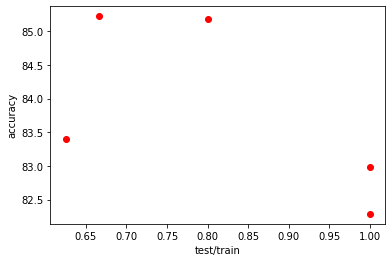

In [66]:
import matplotlib.pyplot as plt
plt.plot( [1.25, 0.999950002499875, 1.4999250037498124,  0.9998750156230471, 1.5996800639872026],[85.1829,82.98,85.22,82.28823,83.405],'ro')
plt.label('train/test')
plt.ylabel('accuracy')

In [64]:
print(x)

[0.8, 1.00005, 0.6667, 1.0000333333333333, 1.000125, 0.625125]
